In [1]:
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque

In [2]:
df = pd.read_csv('Formative Assessment dataset (knapsack problem).csv')

In [3]:
df.head()

,weights,values
0,21,96
1,12,99
2,30,52
3,24,100
4,45,46


In [4]:
# Extract weights and values from the dataframe
weights = df['weights'].tolist()
values = df['values'].tolist()
capacity = 1500

# Simulated Annealing

In [5]:
# Step 1: Calculate the total weight of the current solution
def calculate_weight(solution):
    return sum([solution[i] * weights[i] for i in range(len(solution))])

# Step 2: Calculate the total value of the current solution
def calculate_value(solution):
    return sum([solution[i] * values[i] for i in range(len(solution))])

In [6]:
# Step 3: Generate a neighboring solution by flipping a random bit
def generate_neighbor(solution):
    neighbor = solution.copy()
    index = random.randint(0, len(solution) - 1)
    neighbor[index] = 1 - neighbor[index]  # Flip the bit (add/remove item)
    return neighbor

In [13]:
# Step 4: Simulated annealing for knapsack problem
def simulated_annealing_knapsack(weights, values, capacity, Tmax=100, Tmin=1, alpha=0.95, r=100, acceptance_rate=0.8):
    num_items = len(weights)
    
    # Initial random solution (binary vector)
    current_solution = np.random.randint(2, size=num_items)
    while calculate_weight(current_solution) > capacity:
        current_solution = np.random.randint(2, size=num_items)

    current_value = calculate_value(current_solution)
    best_solution = current_solution.copy()
    best_value = current_value
    iterations_to_best = 0  # Track how many iterations it takes to reach the best solution

    T = Tmax  # Initial temperature
    iteration = 0  # Track the iteration count
    value_history = []

    while T > Tmin:
        for _ in range(r):  # Perform 'r' iterations at each temperature
            iteration += 1

            # Generate a neighboring solution
            neighbor_solution = generate_neighbor(current_solution)

            # Ensure the new solution is valid (i.e., does not exceed the capacity)
            if calculate_weight(neighbor_solution) <= capacity:
                neighbor_value = calculate_value(neighbor_solution)

                # Calculate the cost difference (maximize value, so we use value directly)
                delta_E = neighbor_value - current_value

                # Accept new solution if it improves or based on probability
                if delta_E > 0 or acceptance_rate < math.exp(delta_E / T):
                    current_solution = neighbor_solution
                    current_value = neighbor_value

                    # Update the best solution found so far
                    if current_value > best_value:
                        best_solution = current_solution.copy()
                        best_value = current_value
                        iterations_to_best = iteration  # Record the iteration where the best solution is found

        # Record the best value at each temperature
        value_history.append(best_value)

        # Step 5: Decrease the temperature according to the cooling schedule
        T *= alpha  # Cooling factor
    
    return best_solution, best_value, calculate_weight(best_solution), value_history, iterations_to_best

In [37]:
# Run the simulated annealing algorithm multiple times and record results
num_runs = 10
all_solutions = []
all_values = []
all_weights = []
all_iterations_to_best = []

for i in range(num_runs):
    best_solution, best_value, best_weight, value_history, iterations_to_best = simulated_annealing_knapsack(weights, values, capacity)
    all_solutions.append(best_solution)
    all_values.append(best_value)
    all_weights.append(best_weight)
    all_iterations_to_best.append(iterations_to_best)

In [38]:
# Output 1: Best solutions for each run
print("Best solutions from each run:")
for i, solution in enumerate(all_solutions):
    print(f"Run {i+1}: {solution}")

Best solutions from each run:
Run 1: [1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1
 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1]
Run 2: [0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1
 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1]
Run 3: [1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1
 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0]
Run 4: [1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1
 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0
 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0]
Run 5: [0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0
 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1

In [39]:
# Output 2: Best values and weights for each run
print("\nBest values and weights from each run:")
for i, (value, weight) in enumerate(zip(all_values, all_weights)):
    print(f"Run {i+1}: Best value = {value}, Best weight = {weight}")


Best values and weights from each run:
Run 1: Best value = 3693, Best weight = 1500
Run 2: Best value = 3844, Best weight = 1496
Run 3: Best value = 3936, Best weight = 1498
Run 4: Best value = 3669, Best weight = 1498
Run 5: Best value = 3948, Best weight = 1499
Run 6: Best value = 4067, Best weight = 1498
Run 7: Best value = 3784, Best weight = 1498
Run 8: Best value = 3913, Best weight = 1500
Run 9: Best value = 3964, Best weight = 1500
Run 10: Best value = 4163, Best weight = 1500


In [40]:
# Output 3: Number of iterations to reach the best solution for each run
print("\nIterations to reach the best solution for each run:")
for i, iterations in enumerate(all_iterations_to_best):
    print(f"Run {i+1}: Iterations to best = {iterations}")


Iterations to reach the best solution for each run:
Run 1: Iterations to best = 277
Run 2: Iterations to best = 904
Run 3: Iterations to best = 652
Run 4: Iterations to best = 397
Run 5: Iterations to best = 842
Run 6: Iterations to best = 1105
Run 7: Iterations to best = 707
Run 8: Iterations to best = 314
Run 9: Iterations to best = 1114
Run 10: Iterations to best = 605


In [41]:
# Output 4: Averages over 10 runs
average_value = np.mean(all_values)
average_weight = np.mean(all_weights)
average_iterations_to_best = np.mean(all_iterations_to_best)

print("\nAverage results over 10 runs:")
print(f"Average best value: {average_value}")
print(f"Average best weight: {average_weight}")
print(f"Average iterations to best solution: {average_iterations_to_best}")


Average results over 10 runs:
Average best value: 3898.1
Average best weight: 1498.7
Average iterations to best solution: 691.7


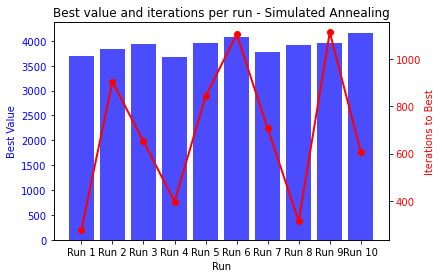

In [50]:
# (Output 2' )Plot the progression of the value history for one run

# Create x-axis labels as Run 1, Run 2, ..., Run 10
x_labels = [f"Run {i+1}" for i in range(len(all_values))]

fig, ax1 = plt.subplots()

# Bar plot for best values
ax1.bar(np.arange(len(all_values)), all_values, tick_label=x_labels, color='b', alpha=0.7)
ax1.set_xlabel("Run")
ax1.set_ylabel("Best Value", color='b')
ax1.set_title("Best value and iterations per run - Simulated Annealing")
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for the iterations
ax2 = ax1.twinx()
ax2.plot(np.arange(len(all_iterations_to_best)), all_iterations_to_best, color='r', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel("Iterations to Best", color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Display the plot with rotated x-axis labels
plt.xticks(rotation=45)
plt.show()

# Tabu Search

In [19]:
# Step 1: Calculate the total weight of the current solution
def calculate_weight_T(solution):
    return sum([solution[i] * weights[i] for i in range(len(solution))])

# Step 2: Calculate the total value of the current solution
def calculate_value_T(solution):
    return sum([solution[i] * values[i] for i in range(len(solution))])

In [20]:
# Step 3: Generate a neighboring solution by flipping a random bit
def generate_neighbor_T(solution):
    neighbor = solution.copy()
    index = random.randint(0, len(solution) - 1)
    neighbor[index] = 1 - neighbor[index]  # Flip the bit (add/remove item)
    return neighbor

In [23]:
# Tabu Search Implementation
def tabu_search(num_items, max_iterations=1000, tabu_tenure=10, aspiration_criteria=0):
    # Step 1: Generate initial solution (random binary vector)
    current_solution = np.random.randint(2, size=num_items)
    while calculate_weight_T(current_solution) > capacity:
        current_solution = np.random.randint(2, size=num_items)

    current_value = calculate_value_T(current_solution)
    best_solution = current_solution.copy()
    best_value = current_value
    iterations_to_best = 0  # Track when the best solution is found

    # Step 2: Initialize the Tabu List with a maximum length and use tuples for comparisons
    tabu_list = deque(maxlen=tabu_tenure)
    value_history = []  # To store value progression

    for iteration in range(max_iterations):
        # Step 3: Generate the neighborhood by flipping one bit at a time
        neighborhood = [generate_neighbor_T(current_solution) for _ in range(10)]
        
        # Step 4: Find the best candidate solution from the neighborhood that is not in the Tabu List
        candidate_solution = None
        candidate_value = -1

        for neighbor in neighborhood:
            if calculate_weight_T(neighbor) <= capacity:
                neighbor_value = calculate_value_T(neighbor)

                # Apply Tabu List and Aspiration Criteria
                if (tuple(neighbor) not in tabu_list) or (neighbor_value > best_value + aspiration_criteria):
                    if neighbor_value > candidate_value:
                        candidate_solution = neighbor
                        candidate_value = neighbor_value
                        
        # Ensure we have a valid candidate solution
        if candidate_solution is None:
            continue  # Skip this iteration if no valid candidate is found

        # Step 5: Update the current solution to the best candidate
        current_solution = candidate_solution
        current_value = candidate_value

        # Update Tabu List with the current solution (convert to tuple for Tabu List storage)
        tabu_list.append(tuple(current_solution))

        # Step 6: Update the best solution found so far
        if current_value > best_value:
            best_solution = current_solution.copy()
            best_value = current_value
            iterations_to_best = iteration  # Record the iteration where the best solution is found

        # Record value history for visualization
        value_history.append(best_value)

    return best_solution, best_value, iterations_to_best, value_history


In [31]:
# Run Tabu Search multiple times and record results
num_runs = 10
all_solutions_T = []
all_values_T = []
all_weights_T = []
all_iterations_to_best_T = []

for i in range(num_runs):
    best_solution, best_value, iterations_to_best, value_history = tabu_search(len(weights))
    all_solutions_T.append(best_solution)
    all_values_T.append(best_value)
    all_weights_T.append(calculate_weight(best_solution))
    all_iterations_to_best_T.append(iterations_to_best)

In [32]:
# Output 1: Best solutions for each run
print("Best solutions from each run:")
for i, solution in enumerate(all_solutions_T):
    print(f"Run {i+1}: {solution}")

Best solutions from each run:
Run 1: [1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1
 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1
 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0]
Run 2: [1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0
 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1
 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0]
Run 3: [1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1
 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1
 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0]
Run 4: [1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0
 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1
 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0]
Run 5: [1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1
 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1

In [33]:
# Output 2: Best values and weights for each run
print("\nBest values and weights from each run:")
for i, (value, weight) in enumerate(zip(all_values_T, all_weights_T)):
    print(f"Run {i+1}: Best value = {value}, Best weight = {weight}")


Best values and weights from each run:
Run 1: Best value = 4383, Best weight = 1497
Run 2: Best value = 4383, Best weight = 1494
Run 3: Best value = 4365, Best weight = 1497
Run 4: Best value = 4387, Best weight = 1499
Run 5: Best value = 4406, Best weight = 1498
Run 6: Best value = 4417, Best weight = 1490
Run 7: Best value = 4396, Best weight = 1497
Run 8: Best value = 4382, Best weight = 1498
Run 9: Best value = 4367, Best weight = 1500
Run 10: Best value = 4375, Best weight = 1500


In [34]:
# Output 3: Number of iterations to reach the best solution for each run
print("\nIterations to reach the best solution for each run:")
for i, iterations in enumerate(all_iterations_to_best_T):
    print(f"Run {i+1}: Iterations to best = {iterations}")


Iterations to reach the best solution for each run:
Run 1: Iterations to best = 863
Run 2: Iterations to best = 402
Run 3: Iterations to best = 723
Run 4: Iterations to best = 990
Run 5: Iterations to best = 771
Run 6: Iterations to best = 321
Run 7: Iterations to best = 878
Run 8: Iterations to best = 237
Run 9: Iterations to best = 958
Run 10: Iterations to best = 970


In [35]:
# Output 4: Averages over 10 runs
average_value_T = np.mean(all_values_T)
average_weight_T = np.mean(all_weights_T)
average_iterations_to_best_T = np.mean(all_iterations_to_best_T)

print("\nAverage results over 10 runs:")
print(f"Average best value: {average_value_T}")
print(f"Average best weight: {average_weight_T}")
print(f"Average iterations to best solution: {average_iterations_to_best_T}")


Average results over 10 runs:
Average best value: 4386.1
Average best weight: 1497.0
Average iterations to best solution: 711.3


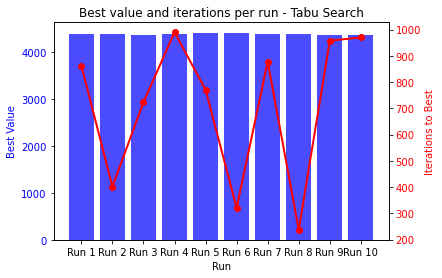

In [49]:
# (Output 2' )Plot the progression of the value history for one run

# Create x-axis labels as Run 1, Run 2, ..., Run 10
x_labels = [f"Run {i+1}" for i in range(len(all_values_T))]

fig, ax1 = plt.subplots()

# Bar plot for best values
ax1.bar(np.arange(len(all_values_T)), all_values_T, tick_label=x_labels, color='b', alpha=0.7)
ax1.set_xlabel("Run")
ax1.set_ylabel("Best Value", color='b')
ax1.set_title("Best value and iterations per run - Tabu Search")
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for the iterations
ax2 = ax1.twinx()
ax2.plot(np.arange(len(all_iterations_to_best_T)), all_iterations_to_best_T, color='r', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel("Iterations to Best", color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Display the plot with rotated x-axis labels
plt.xticks(rotation=45)
plt.show()

# Comparative Analysis

In [60]:
# Standard deviation for best values across 10 runs for Simulated Annealing and Tabu Search
std_dev_values_sa = np.std(all_values)
std_dev_values_ts = np.std(all_values_T)

# Standard deviation for iterations to best solution across 10 runs for Simulated Annealing and Tabu Search
std_dev_iterations_sa = np.std(all_iterations_to_best)
std_dev_iterations_ts = np.std(all_iterations_to_best_T)

# Data for the table
df_table = pd.DataFrame({
    'Aspect': [
        'Best Value (10 runs)',
        'Average Value',
        'Average Iterations',
        'Std Dev of Best Values',
        'Std Dev of Iterations'
    ],
    'Simulated Annealing': [
        int(np.max(all_values)),
        int(np.mean(all_values)),
        int(np.mean(all_iterations_to_best)),
        int(np.std(all_values)),
        int(np.std(all_iterations_to_best))
    ],
    'Tabu Search': [
        int(np.max(all_values_T)),
        int(np.mean(all_values_T)),
        int(np.mean(all_iterations_to_best_T)),
        int(np.std(all_values_T)),
        int(np.std(all_iterations_to_best_T))
    ]
})

# Convert to DataFrame
df_table = df_table.style.hide_index()
df_table

/var/folders/p0/929y8gm10wn_vxfvzswzkltw0000gn/T/ipykernel_91709/2546372683.py:35: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  df_table = df_table.style.hide_index()


Aspect,Simulated Annealing,Tabu Search
Best Value (10 runs),4163,4417
Average Value,3898,4386
Average Iterations,691,711
Std Dev of Best Values,147,15
Std Dev of Iterations,287,270
